# 9.1 The Pearson Correlation Coefficient

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, covariance provides a measure of how related the variables are to each other: $$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. Correlation builds on covariance and overcomes this drawback via rescaling, thereby measuring (linear) relatedness exclusively. Correlation is much more common because of this difference.

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: $$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$



In [5]:
iris = sb.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x = iris.sepal_length
y = iris.petal_length
colors = iris.species.to_numpy()
color_codes = []
for color in colors:
    if (color == 'setosa'):
        color_codes.append(1)
    elif (color == 'versicolor'):
        color_codes.append(2)
    else: color_codes.append(3)


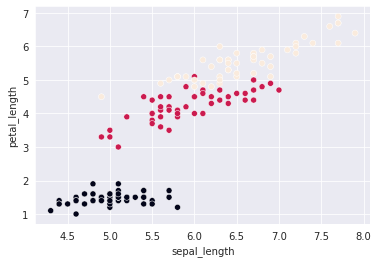

In [17]:
sb.set_style('darkgrid')
_ = sb.scatterplot(x=x, y=y, c=color_codes)

In [19]:
n = iris.sepal_width.size
xbar, ybar = x.mean(), y.mean()

product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

cov = sum(product)/n
r = cov/(np.std(x)*np.std(y))

n, xbar, ybar, cov, r

(150,
 5.843333333333335,
 3.7580000000000027,
 1.2658199999999995,
 0.8717537758865828)

We reached this point in Probability. Now, as for how to determine a p-value, we first calculate the t-statistic... $$ t = r \sqrt{\frac{n-2}{1-r^2}} $$

- $n$: number of samples
- $r$: r-squared
- $r$: coefficient r for the square root

In [22]:
t = r*((n-2)/(1-r**2))**(1/2)
t                               # a bic t-statistic. will be statistically significant.

21.64601934575973

...which we can convert to a p-value as we've done several times above:

In [24]:
import scipy.stats as st

def p_from_t(t, n):
    return 2 * st.t.cdf(-abs(t), n-1) # 2nd arg to t.cdf() is "degrees of freedom"

p = p_from_t(t, n-1) 
p

1.0386674194500194e-47

In [25]:
-np.log10(p)

46.98352349096027

This confirms that iris sepal length is extremely positively correlated with petal length.

All of the above can be done in a single line with SciPy's pearsonr() method:

In [26]:
st.pearsonr(x, y) # returns: correlation between two samples, p-value

(0.8717537758865831, 1.0386674194498099e-47)

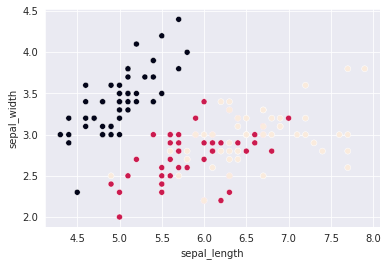

In [29]:
_ = sb.scatterplot(x=iris.sepal_length, y=iris.sepal_width, c=color_codes)

In [28]:
st.pearsonr(iris.sepal_length, iris.sepal_width)
# modest negative correlation of -0.11
# NOT statistically significant - sepal's length and width are statiatically NOT meaningful.

(-0.11756978413300206, 0.15189826071144766)

And, for reference, here's a correlation that is not significant ($r \approx 0$):

# 9.2 R-squared Coefficient of Determination

...also known as $r^2$, this is the proportion of variance in one variable explained by another.

It can range from 0 to 1 and it is simply the square of the Pearson $r$:



Just because there's correlation between two things doesn't mean there's causation.
For instance, compare the coreelation coefficients between:  
  - 1) Sepal length * Petal length (linearly positively correlated) 0.76 = 76%  
  - 2) Sepal_length * Sepal_width (no correlation) 0.014 = 1.4%

In [30]:
rsq = r**2
rsq

0.7599546457725144

In this case, it indicates that 76% of the variance in iris petal length can be explained by sepal length. (This is easier to understand where one variable could straightforwardly drive variation in the other; more on that in Segment 2.)

<br/>

For comparison, only 1.4% of the variance in sepal width can be explained by sepal length:

In [31]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

0.013822654141080705

Criteria for inferring causal relationships:  
  - 1) must have covariation: two variables must vary together.  
  - 2) temporal precedence: the affected variable must vary after the causal variable varies.
    - The causal variable varies first, and that change causes the affected variable to vary.


# 9.3 Correlation versus Causation


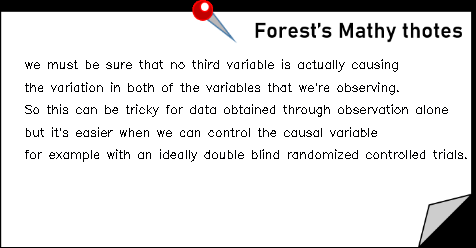

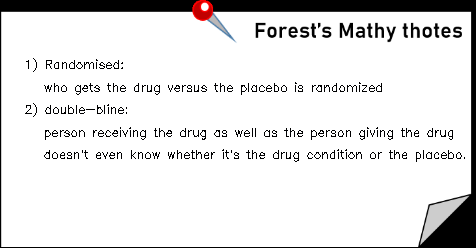

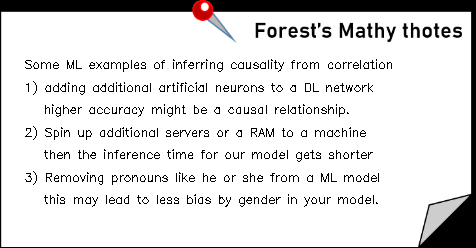

In [73]:
# Lecture notes from 9.3 Correlation versus Causation by dr. Jon Krohn
note1 = sticky_notes(notes1, fontScale=0.4, fontFace=cv2.FONT_HERSHEY_SIMPLEX)
note2 = sticky_notes(notes2, fontScale=0.4, fontFace=cv2.FONT_HERSHEY_SIMPLEX)
note3 = sticky_notes(notes3, fontScale=0.4, fontFace=cv2.FONT_HERSHEY_SIMPLEX)

In [ ]:
# start coding here. 

# 9.4 Correcting for Multiple Comparisons

A major issue with frequentist statistics is the issue of [multiple comparisons](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/6-statistics.ipynb):

- If you perform 20 statistical tests where there is no real effect (i.e., the null hypothesis is true), then we would expect one of them to come up significant by chance alone (i.e., a false positive or Type I error).
- If you perform a hundred tests in such a circumstance, then you should expect five false positives.

The most straightforward, and indeed the most widely-used, solution is the Bonferroni correction (named after the 20th c. Italian mathematician [Carlo Emilio Bonferroni](https://mathshistory.st-andrews.ac.uk/Biographies/Bonferroni/)). Assuming, we'd like an overall $\alpha = .05$:

- If we're planning on conducting ten tests ($m=10$), the **significance threshold** for each individual test is 
  - $\frac{\alpha}{m} = \frac{.05}{10} = .005$
  - With 20 tests, it's $\frac{\alpha}{m} = \frac{.05}{20} = .0025$
  - With 100 tests, it's $\frac{\alpha}{m} = \frac{.05}{100} = .0005$

(Other, less straightforward, approaches for adjusting $\alpha$ for multiple comparisons exist. They're beyond our scope, but the major ones are listed under the General methods of alpha adjustment for multiple comparisons heading here.)




(Other, less straightforward, approaches for adjusting $\alpha$ for multiple comparisons exist. They're beyond our scope, but the major ones are listed under the General methods of alpha adjustment for multiple comparisons heading here.)


# Important Functions
- `st.pearsonr(x, y)`
- `2 * st.t.cdf(-abs(t), n-1)`
- Extract column values into a list
  - ` dataset.column.to_numpy()`
- Scatter-plot with varying colours
  - `sb.scatterplot(x=, y=, c=color_codes)`

## References

My Statistics learning notebook following the live lesson series [**"Probability and Statistics for Machine Learning"**](https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb

For further learning:
- Causality by Judea Pearl  
  http://bayes.cs.ucla.edu/stat_bio.html